# Proyecto: Análisis de Éxito en Videojuegos para Ice Online Store

El objetivo de Ice Online Store es identificar los factores clave que influyen en el éxito de los videojuegos para optimizar la selección de productos y aumentar las ventas. Este proyecto analizará datos históricos hasta 2016 para detectar tendencias y planificar campañas publicitarias más efectivas en 2017.

Etapas del Análisis
1. Preparación de Datos
Se realizará una revisión y ajuste de los datos, incluyendo la limpieza y el tratamiento de valores ausentes, con el fin de preparar el dataset para el análisis posterior.

2. Análisis Exploratorio de Datos
Se explorarán tendencias en el lanzamiento de juegos, ventas por plataforma y diferencias en las ventas de distintos géneros. Esto permitirá identificar las plataformas y juegos con mayor potencial.

3. Impacto de las Reseñas en las Ventas
Se analizará cómo las reseñas de usuarios y críticos afectan las ventas, identificando posibles correlaciones entre la calidad percibida y el éxito comercial.

4. Perfil de Usuario por Región
Se evaluarán las preferencias regionales en cuanto a plataformas, géneros y la influencia de las clasificaciones ESRB en las ventas, ajustando las estrategias según cada mercado.

5. Pruebas de Hipótesis
Se llevarán a cabo pruebas para comparar las calificaciones de usuarios en distintas plataformas y géneros, con el objetivo de identificar diferencias significativas.

Este análisis proporcionará información clave para la planificación estratégica de Ice Online Store, permitiéndole tomar decisiones informadas que maximicen su éxito en el mercado de videojuegos en 2017.

# Paso 1: Abrir el archivo de datos y estudiar la información general

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
file_path = '/datasets/games.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2: Vamos a reemplazar los datos 

In [5]:
data.columns = data.columns.str.lower()

Explicación:
data.columns.str.lower() convierte todos los nombres de las columnas a minúsculas.
Luego, reasignamos estos nombres de columna modificados de nuevo al DataFrame data.

In [6]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce')

In [7]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [8]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Explicación:
data.isnull().sum() muestra el número de valores ausentes en cada columna.

In [9]:
data['year_of_release'].fillna(data['year_of_release'].median(), inplace=True)

Explicación:
fillna() rellena los valores NaN con la mediana de la columna.
inplace=True actualiza el DataFrame en el lugar, sin necesidad de crear una nueva variable.
A la hora de rellenar se puede usar la media, la mediana, o un valor específico. Por ejemplo, para rellenar los valores ausentes en la columna year con la mediana, como se muestra.

In [10]:
data.replace('TBD', pd.NA, inplace=True)

La razón para convertir "TBD" en NaN es que muchos métodos de análisis de datos están diseñados para manejar NaN y podrían no funcionar correctamente si encuentran cadenas de texto como "TBD". Esto se debe a que "TBD" significa que el dato no está disponible, lo que es equivalente a no tener ningún valor en ese lugar.

In [11]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Explicación: suma las ventas en todas las regiones para cada juego.
axis=1 asegura que la suma se haga fila por fila.

<span style='color:blue'>Análisis de Valores Nulos: </span>

In [12]:
# Calculando el porcentaje de valores nulos para 'critic_score' y 'user_score'
critic_null_percentage = data['critic_score'].isnull().mean() * 100
user_null_percentage = data['user_score'].isnull().mean() * 100

print(f"Porcentaje de valores nulos en 'critic_score': {critic_null_percentage:.2f}%")
print(f"Porcentaje de valores nulos en 'user_score': {user_null_percentage:.2f}%")

Porcentaje de valores nulos en 'critic_score': 51.32%
Porcentaje de valores nulos en 'user_score': 40.09%


In [47]:
# Imputación para 'critic_score' con la mediana
data['critic_score'].fillna(data['critic_score'].median(), inplace=True)

# Imputación para 'user_score' con la mediana
# Primero asegúrate de convertir 'user_score' a numérico, tratando 'tbd' como NaN si no se ha hecho antes
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].fillna(data['user_score'].median(), inplace=True)

# Verificar cambios después de la imputación
print(data[['critic_score', 'user_score']].describe())

       critic_score   user_score
count  16715.000000  16715.00000
mean      70.010649      7.32974
std        9.777494      1.02785
min       13.000000      0.00000
25%       71.000000      7.50000
50%       71.000000      7.50000
75%       71.000000      7.50000
max       98.000000      9.70000


# Paso 3: Analiza los datos
En este paso, vamos a analizar cuántos juegos fueron lanzados en diferentes años y a ver si los datos de cada período son significativos.

 <span style='color:blue'>Contar los juegos lanzados por año: </span>
Primero, vamos a contar cuántos juegos fueron lanzados en cada año. Para ello, utilizamos la columna que contiene la información del año de lanzamiento. Si has convertido esta columna a un tipo numérico (como int), puedes usar el siguiente código:

In [13]:
games_per_year = data['year_of_release'].value_counts().sort_index()

Explicación:
Cuenta el número de juegos para cada año.
sort_index(): Ordena los años en orden cronológico.

In [14]:
print(games_per_year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1466
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


 <span style='color:blue'> Vamos a visualizar los datos usando un gráfico de barras: </span>

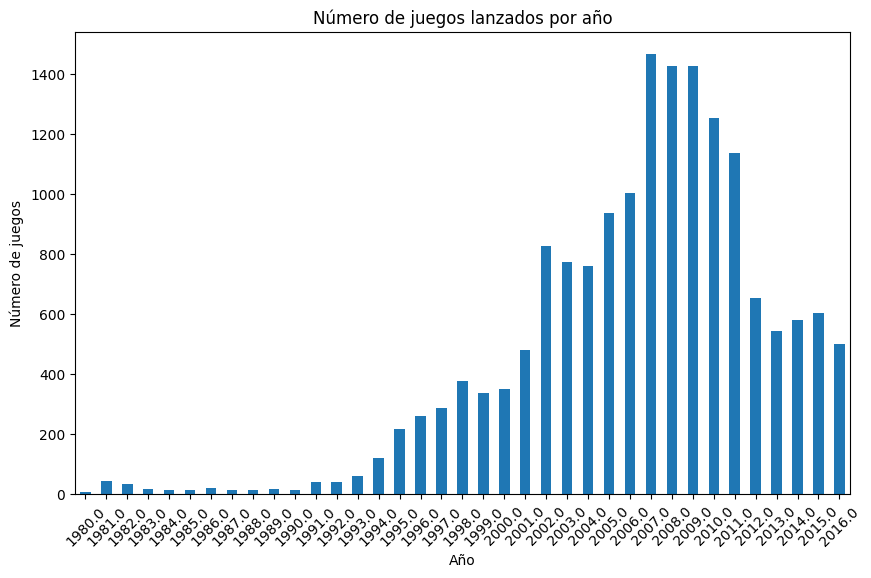

In [15]:
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Contar el número de juegos lanzados en cada año
games_per_year = data['year_of_release'].value_counts().sort_index()

In [17]:
print(games_per_year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1466
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


Resolviendo a la pregunta ¿Son significativos los datos de cada período?:
El análisis del número de juegos lanzados por año revela un crecimiento significativo a partir del año 2000. Los datos muestran un aumento constante en la cantidad de lanzamientos, con picos notables entre 2005 y 2008, alcanzando el máximo en 2007 con 1466 juegos. Después de este período, aunque el número de lanzamientos se mantiene alto, se observa una ligera disminución.

<span style='color:blue'> Calcular las ventas totales por plataforma: </span> Primero, necesitamos sumar las ventas en todas las regiones para cada plataforma y encontrar las plataformas con mayores ventas totales. Usa el siguiente código para hacerlo:

In [18]:
# Crear una columna con la suma total de ventas por juego
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agrupar los datos por plataforma y sumar las ventas totales
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


Explicación: Agrupa los datos por plataforma y suma las ventas totales.
sort_values(ascending=False): Ordena las plataformas por ventas totales en orden descendente.

In [19]:
print(platform_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [20]:
top_platforms = platform_sales.head(3).index

# Filtrar los datos para las principales plataformas
top_platform_data = data[data['platform'].isin(top_platforms)]

# Agrupar por año y plataforma y sumar las ventas totales
sales_by_year_and_platform = top_platform_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

print(sales_by_year_and_platform)

platform            PS2     PS3    X360
year_of_release                        
2000.0            39.17     NaN     NaN
2001.0           166.43     NaN     NaN
2002.0           205.38     NaN     NaN
2003.0           184.31     NaN     NaN
2004.0           211.81     NaN     NaN
2005.0           160.66     NaN    8.25
2006.0           103.42   20.96   51.62
2007.0            98.20   81.50  105.59
2008.0            53.90  118.52  135.26
2009.0            26.40  130.93  120.29
2010.0             5.64  142.17  170.03
2011.0             0.45  156.78  143.84
2012.0              NaN  107.36   99.74
2013.0              NaN  113.25   88.58
2014.0              NaN   47.76   34.74
2015.0              NaN   16.82   11.96
2016.0              NaN    3.60    1.52


Explicación: Filtramos los datos para las plataformas principales y agrupamos por año y plataforma, sumando las ventas.
unstack(): Transforma la tabla para que las plataformas aparezcan como columnas.

<span style='color:blue'> Visualizamos en un gráfico de líneas: </span>

<Figure size 1200x800 with 0 Axes>

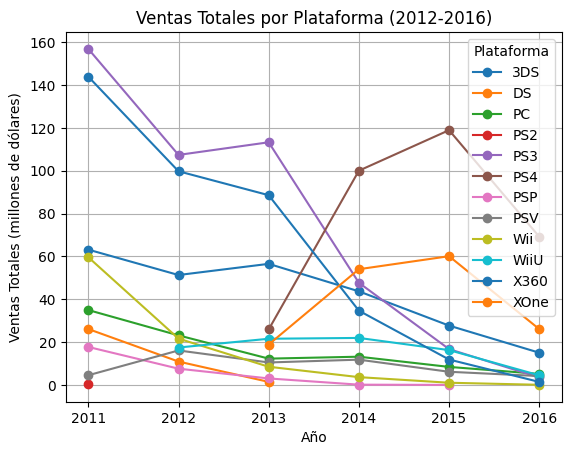

In [51]:
last_year = data['year_of_release'].max()
start_year = last_year - 5  

# Filtrar los datos para los últimos 5 años
recent_data = data[(data['year_of_release'] >= start_year) & (data['year_of_release'] <= last_year)]

# Agrupar los datos por año y plataforma, y sumar las ventas
recent_sales_by_year_and_platform = recent_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Gráfica de líneas para las ventas por plataforma en los últimos 5 años
plt.figure(figsize=(12, 8))
recent_sales_by_year_and_platform.plot(kind='line', marker='o')  
plt.title('Ventas Totales por Plataforma (2012-2016)')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones de dólares)')
plt.legend(title='Plataforma')
plt.grid(True)  
plt.show()

<span style='color:blue'> Buscar plataformas populares que ahora no tienen ventas: </span> 

Vamos a comparar las plataformas actuales con las de años anteriores para identificar aquellas que fueron populares pero ya no tienen ventas.

In [22]:
# Obtener todas las plataformas únicas
all_platforms = data['platform'].unique()

# Obtener plataformas actuales (últimos años)
recent_years = data['year_of_release'].max() - 5  # Considerar los últimos 5 años como reciente
recent_platforms = data[data['year_of_release'] >= recent_years]['platform'].unique()

# Comparar con plataformas que ya no tienen ventas
discontinued_platforms = set(all_platforms) - set(recent_platforms)
print(discontinued_platforms)

{'SNES', 'PS', '3DO', 'GB', 'GBA', 'N64', 'GG', '2600', 'SAT', 'NG', 'NES', 'DC', 'PCFX', 'XB', 'SCD', 'WS', 'GEN', 'TG16', 'GC'}


<span style='color:blue'> Calcular el tiempo promedio que tarda una plataforma en aparecer y desaparecer: </span> 


In [23]:
# Obtener el primer y último año de lanzamiento para cada plataforma
platform_lifetime = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']

# Calcular el tiempo promedio
average_lifetime = platform_lifetime['lifetime'].mean()
print(f'Tiempo promedio de vida de una plataforma: {average_lifetime:.2f} años')

Tiempo promedio de vida de una plataforma: 8.94 años


Respondiendo a la pregunta ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?: 
Las plataformas de videojuegos generalmente tienen una vida útil de aproximadamente 8.94 años desde su lanzamiento hasta su desaparición. Las nuevas plataformas tienden a surgir con un tiempo de aparición que varía, pero frecuentemente se observan lanzamientos de nuevas plataformas cada pocos años. Las plataformas antiguas, por otro lado, tienden a desaparecer gradualmente, con una disminución notable en ventas antes de desaparecer por completo. Este patrón indica que la industria de los videojuegos es dinámica, con ciclos de vida relativamente cortos para las plataformas debido a la rápida evolución tecnológica y las cambiantes preferencias del mercado.

<span style='color:blue'> Calcular el tiempo promedio de datos relevante para construir un modelo para 2017: </span>

Generalmente, un período de 5 a 10 años es adecuado para captar tendencias recientes sin incluir datos que podrían estar desactualizados.

In [24]:
# Definir el año final y el período a analizar
end_year = 2016
start_year = end_year - 5

# Filtrar los datos para el período
recent_data = data[(data['year_of_release'] >= start_year) & (data['year_of_release'] <= end_year)]

print(recent_data)

                                 name platform  year_of_release         genre  \
16                 Grand Theft Auto V      PS3           2013.0        Action   
23                 Grand Theft Auto V     X360           2013.0        Action   
29     Call of Duty: Modern Warfare 3     X360           2011.0       Shooter   
31          Call of Duty: Black Ops 3      PS4           2015.0       Shooter   
33                Pokemon X/Pokemon Y      3DS           2013.0  Role-Playing   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV           2016.0     Adventure   
16707                Aiyoku no Eustia      PSV           2014.0          Misc   
16710   Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16712         Haitaka no Psychedelica      PSV           2016.0     Adventure   
16714             Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  

Explicación: Este código filtra los datos para incluir solo los años entre 2012 y 2016.

<span style='color:blue'> Calcular ventas totales por plataforma en el período reciente: </span>

In [25]:
# Agrupar por plataforma y sumar las ventas totales
recent_platform_sales = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(recent_platform_sales)

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64


Explicación: Este código agrupa las ventas por plataforma y las ordena en orden descendente para ver cuáles son las plataformas líderes.

<span style='color:blue'> Calcular la tasa de crecimiento de las plataformas: </span>

In [26]:
# Agrupar por año y plataforma y sumar las ventas para cada año
yearly_sales = recent_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Calcular la tasa de crecimiento para cada plataforma
growth_rate = yearly_sales.pct_change().mean()
growth_rate = growth_rate.sort_values(ascending=False)

print(growth_rate)

platform
PS4     0.873019
XOne    0.466291
PSV     0.295956
PS2     0.000000
WiiU   -0.181504
3DS    -0.226505
DS     -0.287915
PC     -0.294703
PS3    -0.454485
X360   -0.510986
PSP    -0.516741
Wii    -0.668385
dtype: float64


Explicación: Este código calcula la tasa de crecimiento promedio anual para cada plataforma en el período analizado.

<span style='color:blue'> Seleccionar plataformas potencialmente rentables: </span>

In [27]:
# Seleccionar plataformas con ventas altas y crecimiento positivo
profitable_platforms = growth_rate[growth_rate > 0].index
selected_platforms = recent_platform_sales.loc[profitable_platforms]

print(selected_platforms)

platform
PS4     314.14
XOne    159.32
PSV      53.81
Name: total_sales, dtype: float64


Explicación: Este código selecciona las plataformas que tienen tanto un crecimiento positivo como ventas totales significativas, haciéndolas candidatas para ser rentables en 2017.

Período de Datos: Se seleccionó el período entre 2012 y 2016 para construir un modelo para 2017, ya que este intervalo captura las tendencias recientes en la industria de los videojuegos.

Plataformas Líderes en Ventas: Durante este período, las plataformas con las mayores ventas fueron PS3     445.57
X360/380.38, PS4/314.14, 3DS/257.81, XOne/159.32, lo que indica que estas plataformas dominan el mercado en términos de volumen de ventas.

Crecimiento de Plataformas: Las plataformas PS4/0.873019, XOne/0.466291, PSV/0.295956, PS2/0.000000,  mostraron un crecimiento positivo en ventas, indicando un aumento en popularidad y una posible expansión en el mercado.

Plataformas Potencialmente Rentables: Combinando el volumen de ventas con el crecimiento positivo, se identificaron plataformas como PS4/314.14, XOne/159.32, PSV/53.81, que son potencialmente rentables y representan buenas oportunidades para inversión y desarrollo en 2017.

<span style='color:blue'> Crear un diagrama de caja para las ventas globales por plataforma </span>

In [28]:
if 'total_sales' not in data.columns:
    data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(data)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

Explicación: Este código verifica que la columna total_sales ya exista. 

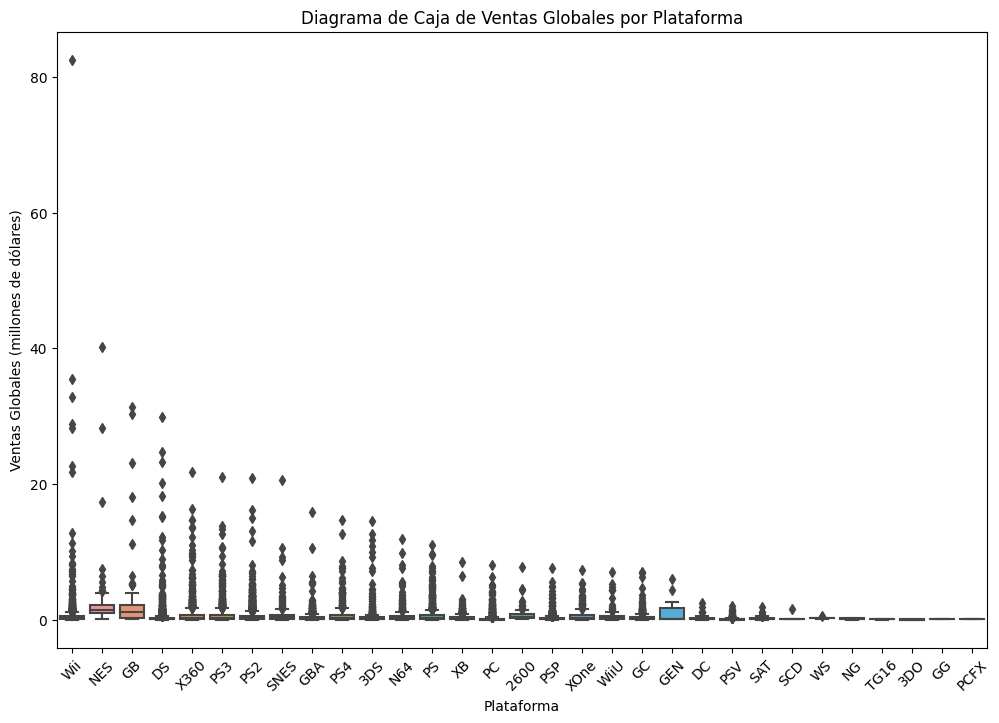

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=data)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de dólares)')
plt.xticks(rotation=45)  # Rotar los nombres de las plataformas para mejor visualización
plt.show()

Contestando a las preguntas: ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?. Las diferencias en las ventas entre plataformas son notables. Algunas plataformas como Wii y NES destacan por tener juegos con ventas excepcionalmente altas, mientras que otras, como PCFX y 3DO, tienen ventas consistentemente bajas.
Las plataformas más exitosas, como Wii y NES, muestran un promedio de ventas más alto. En contraste, las plataformas menos populares tienen promedios mucho más bajos, indicando menor éxito comercial.

<span style='color:blue'> Creación del Gráfico de Dispersión: </span>

Dado que Wii mostró un buen desempeño en ventas en los análisis anteriores, vamos a seleccionarla para este análisis.

In [30]:
# Filtramos los datos para la plataforma Wii
wii_data = data[data['platform'] == 'Wii']

print(wii_data)

                                                    name platform  \
0                                             Wii Sports      Wii   
2                                         Mario Kart Wii      Wii   
3                                      Wii Sports Resort      Wii   
7                                               Wii Play      Wii   
8                              New Super Mario Bros. Wii      Wii   
...                                                  ...      ...   
16589                                          Bomberman      Wii   
16626                   The Ultimate Battle of the Sexes      Wii   
16664           Mahou Sensei Negima!? Neo-Pactio Fight!!      Wii   
16685              Help Wanted: 50 Wacky Jobs (jp sales)      Wii   
16686  Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...      Wii   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
0               2006.0      Sports     41.36     28.96      3.77         8.45   
2        

Explicación: Se filtraron los datos de la platafroma Wii

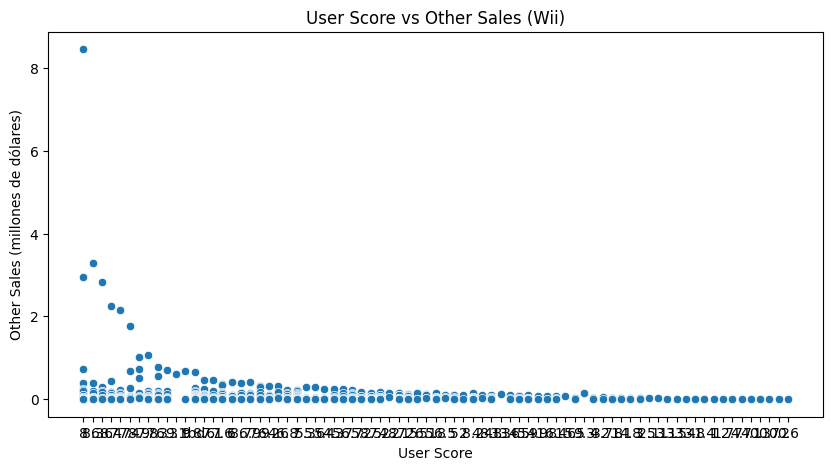

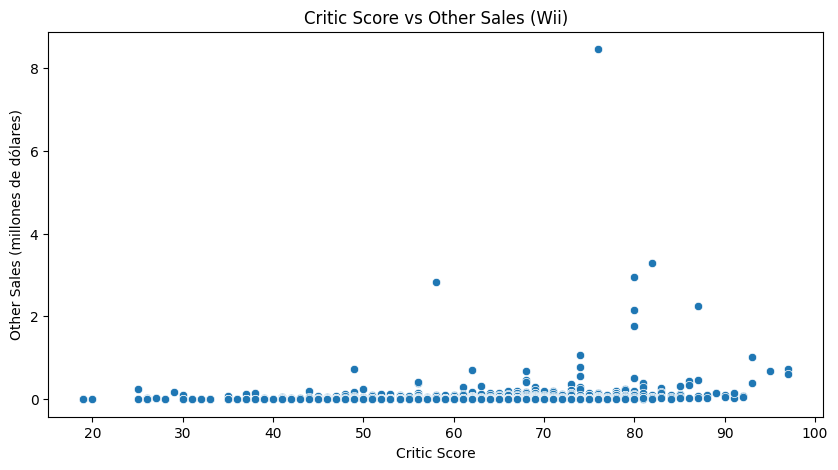

In [31]:
# Gráfico de dispersión para User Score vs Other Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=wii_data, x='user_score', y='other_sales')
plt.title('User Score vs Other Sales (Wii)')
plt.xlabel('User Score')
plt.ylabel('Other Sales (millones de dólares)')
plt.show()

# Gráfico de dispersión para Critic Score vs Other Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=wii_data, x='critic_score', y='other_sales')
plt.title('Critic Score vs Other Sales (Wii)')
plt.xlabel('Critic Score')
plt.ylabel('Other Sales (millones de dólares)')
plt.show()

Explicación: Se crearon dos gráficos de dispersión: uno para la relación entre las reseñas de usuarios (user_score) y las ventas globales (other_sales), y otro para la relación entre las reseñas de críticos (critic_score) y las ventas globales.

In [32]:
# Hacer una copia de los datos para asegurarse de que los cambios no afecten al DataFrame original
wii_data = data[data['platform'] == 'Wii'].copy()

# Convertir a numérico con .loc para asegurar que se modifican los datos correctos
wii_data.loc[:, 'user_score'] = pd.to_numeric(wii_data['user_score'], errors='coerce')
wii_data.loc[:, 'critic_score'] = pd.to_numeric(wii_data['critic_score'], errors='coerce')

# Ahora puedes calcular la correlación sin advertencias
correlacion_usuario = wii_data['user_score'].corr(wii_data['other_sales'])
correlacion_critico = wii_data['critic_score'].corr(wii_data['other_sales'])

print(f"Correlación entre User Score y Other Sales: {correlacion_usuario:.2f}")
print(f"Correlación entre Critic Score y Other Sales: {correlacion_critico:.2f}")

Correlación entre User Score y Other Sales: 0.10
Correlación entre Critic Score y Other Sales: 0.16


Estos resultados sugieren que para la plataforma Wii, las estrategias de marketing y desarrollo de juegos podrían enfocarse menos en maximizar las puntuaciones de reseñas y más en otros aspectos como la innovación en el juego, la mejora de la experiencia del usuario, o la ampliación de la base de usuarios. Las compañías podrían considerar invertir en aspectos que directamente mejoren la experiencia de juego o en campañas de marketing que apunten a atraer a un público más amplio.

<span style='color:blue'> Identificar Juegos en Múltiples Plataformas </span>

In [33]:
# Agrupar por nombre del juego y listar las plataformas para cada juego
game_platforms = data.groupby('name')['platform'].unique()

# Filtrar juegos que aparecen en más de una plataforma
multi_platform_games = game_platforms[game_platforms.apply(len) > 1]

print(multi_platform_games)

name
 Frozen: Olaf's Quest                                    [3DS, DS]
007: Quantum of Solace               [X360, PS3, Wii, PS2, DS, PC]
007: The World is not Enough                             [N64, PS]
11eyes: CrossOver                                      [X360, PSP]
18 Wheeler: American Pro Trucker                         [PS2, GC]
                                                 ...              
iCarly                                                   [DS, Wii]
iCarly 2: iJoin The Click!                               [DS, Wii]
nail'd                                                 [PS3, X360]
pro evolution soccer 2011           [PS3, PSP, X360, PS2, Wii, PC]
uDraw Studio: Instant Artist                           [Wii, X360]
Name: platform, Length: 2805, dtype: object


Explicación: Se agruparon los datos por nombre de juego y contar en cuántas plataformas diferentes aparece cada uno, para poder encontrar los juegos que están disponibles en varias plataformas.

In [34]:
# Crear un DataFrame que sólo incluya los juegos que aparecen en múltiples plataformas
filtered_data = data[data['name'].isin(multi_platform_games.index)]

# Agrupar por nombre del juego y plataforma, y sumar las ventas en otras regiones
platform_sales_comparison = filtered_data.groupby(['name', 'platform'])['other_sales'].sum().unstack()

print(platform_sales_comparison)

platform                          2600   3DS  DC    DS  GB  GBA   GC  GEN  \
name                                                                        
 Frozen: Olaf's Quest              NaN  0.05 NaN  0.04 NaN  NaN  NaN  NaN   
007: Quantum of Solace             NaN   NaN NaN  0.01 NaN  NaN  NaN  NaN   
007: The World is not Enough       NaN   NaN NaN   NaN NaN  NaN  NaN  NaN   
11eyes: CrossOver                  NaN   NaN NaN   NaN NaN  NaN  NaN  NaN   
18 Wheeler: American Pro Trucker   NaN   NaN NaN   NaN NaN  NaN  0.0  NaN   
...                                ...   ...  ..   ...  ..  ...  ...  ...   
iCarly                             NaN   NaN NaN  0.05 NaN  NaN  NaN  NaN   
iCarly 2: iJoin The Click!         NaN   NaN NaN  0.02 NaN  NaN  NaN  NaN   
nail'd                             NaN   NaN NaN   NaN NaN  NaN  NaN  NaN   
pro evolution soccer 2011          NaN   NaN NaN   NaN NaN  NaN  NaN  NaN   
uDraw Studio: Instant Artist       NaN   NaN NaN   NaN NaN  NaN  NaN  NaN   

Explicación: Se compararon las ventas de juegos en diferentes plataformas, extrayendo sus datos de ventas para cada plataforma y compararlos.

<span style='color:blue'> Comparar las ventas de los mismos juegos en otras plataformas:</span>

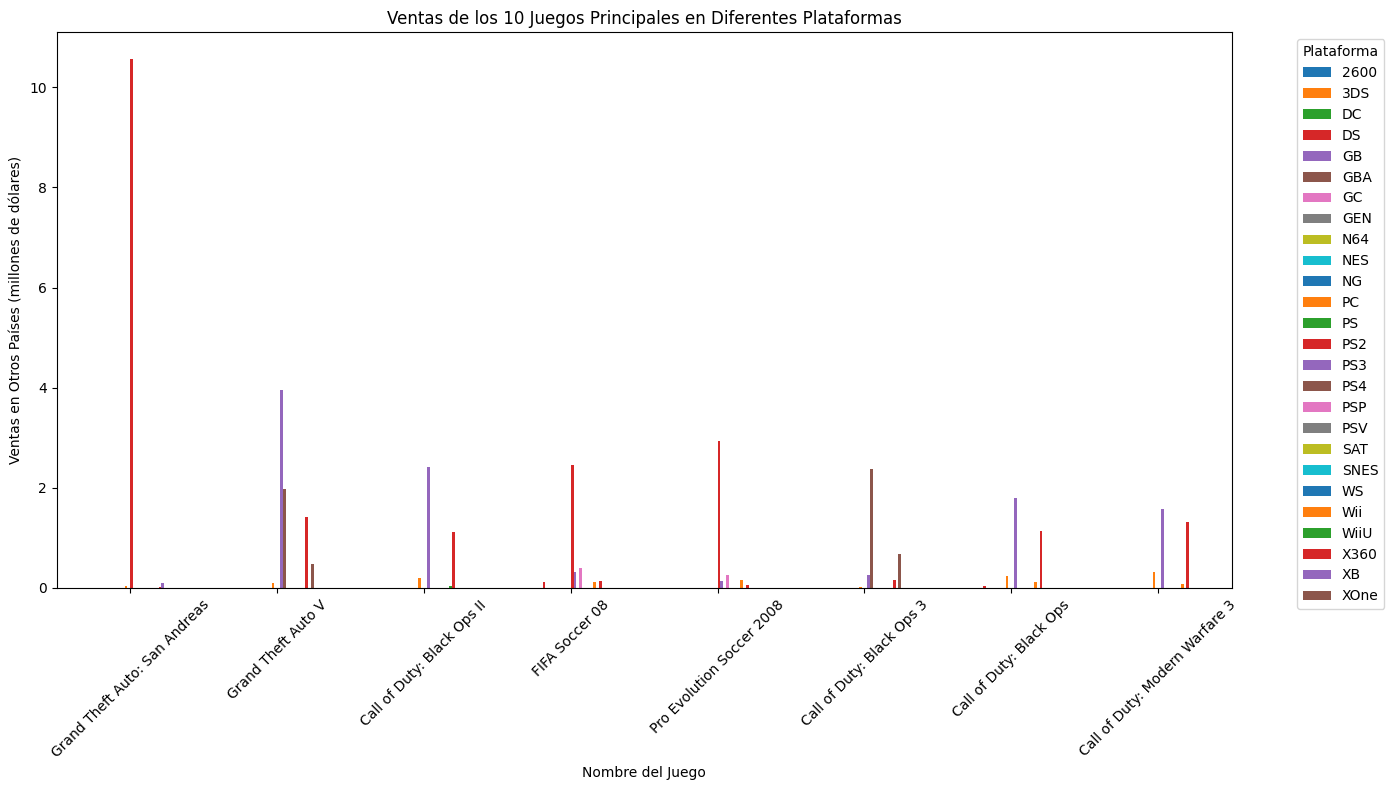

In [35]:
# Visualizar las ventas de juegos en diferentes plataformas (limitado a 8 juegos para simplicidad)
top_games = platform_sales_comparison.sum(axis=1).nlargest(8).index
filtered_sales_comparison = platform_sales_comparison.loc[top_games]

filtered_sales_comparison.plot(kind='bar', figsize=(14, 8), title='Ventas de los 10 Juegos Principales en Diferentes Plataformas')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas en Otros Países (millones de dólares)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

Explicación: Se visualizaron los datos usando un gráfico de barras para mostrar las ventas de cada juego en las diferentes plataformas. (Se limitó a 8 ya que los datos eran demasiadon para un solo  gráfico. Sepuede ver cómo las ventas de los mismos juegos varían entre diferentes plataformas. Ciertos juegos tienen mejores ventas en consolas específicas debido a la base de usuarios, la compatibilidad del juego con la plataforma, o estrategias de marketing dirigidas.

<span style='color:blue'> Análisis de la distribución general de los juegos por género y evaluación cuáles son los más rentables: </span>

In [36]:
# Agrupar los datos por género y sumar las ventas en otras regiones
genre_sales = data.groupby('genre')['other_sales'].sum().sort_values(ascending=False)

genre_sales

genre
Action          184.60
Sports          134.51
Shooter         104.11
Racing           76.10
Misc             74.39
Role-Playing     59.63
Platform         51.09
Fighting         36.36
Simulation       30.73
Adventure        16.49
Puzzle           12.38
Strategy         10.85
Name: other_sales, dtype: float64

Explicación: Se agruparon los datos por género y sumaron las ventas en otras regiones para cada género. Esto nos dará una idea de las ventas totales por género.

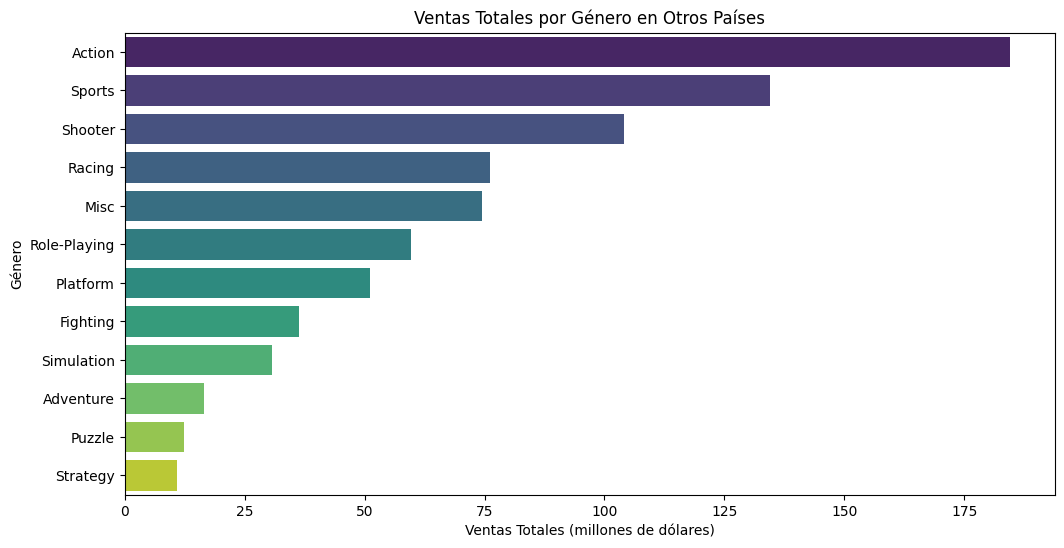

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Ventas Totales por Género en Otros Países')
plt.xlabel('Ventas Totales (millones de dólares)')
plt.ylabel('Género')
plt.show()

Explicación: Se creó un gráfico de barras que muestre las ventas totales por género.

Respondiendo a las preguntas ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?. 

Géneros más Rentables: Los géneros como Acción, Deportes, y Disparos son los más rentables. Estos atraen grandes audiencias y generan altas ventas a nivel mundial, gracias a su dinamismo y frecuentes lanzamientos de nuevos títulos.

Géneros con Ventas Bajas: Géneros como Estrategia, Rompecabezas, y Aventura suelen tener ventas menores porque se dirigen a nichos específicos y carecen de una presencia masiva en el mercado.

Generalización: Los géneros con altas ventas ofrecen experiencias emocionantes y suelen ser más promocionados y desarrollados. Los géneros menos vendidos podrían beneficiarse de estrategias de marketing más específicas o enfoques innovadores para aumentar su rentabilidad.

# Paso 4. Crea un perfil de usuario para cada región

<span style='color:blue'> Cinco plataformas principales por región: </span>

In [38]:
# Agrupar los datos por plataforma y sumar las ventas por región
platform_sales_na = data.groupby('platform')['na_sales'].sum().nlargest(5)
platform_sales_eu = data.groupby('platform')['eu_sales'].sum().nlargest(5)
platform_sales_jp = data.groupby('platform')['jp_sales'].sum().nlargest(5)

platform_sales_na
platform_sales_eu
platform_sales_jp

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Explicación: Se calcularon las ventas totales por plataforma para cada una de las regiones especificadas.

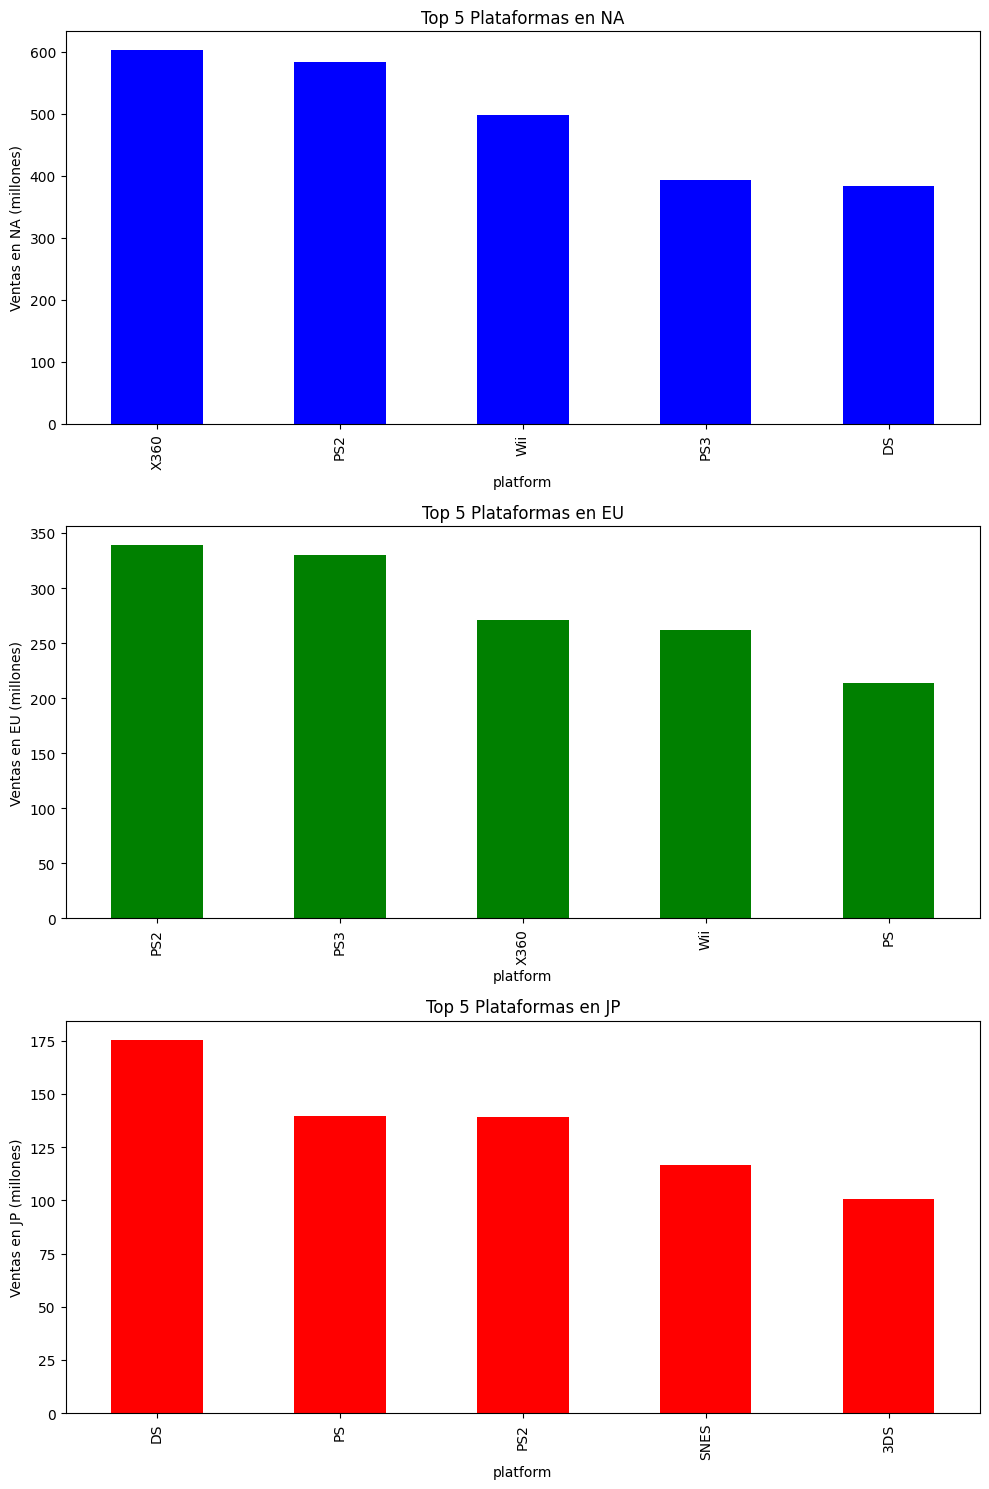

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

platform_sales_na.plot(kind='bar', ax=ax[0], color='blue', title='Top 5 Plataformas en NA')
ax[0].set_ylabel('Ventas en NA (millones)')

platform_sales_eu.plot(kind='bar', ax=ax[1], color='green', title='Top 5 Plataformas en EU')
ax[1].set_ylabel('Ventas en EU (millones)')

platform_sales_jp.plot(kind='bar', ax=ax[2], color='red', title='Top 5 Plataformas en JP')
ax[2].set_ylabel('Ventas en JP (millones)')

plt.tight_layout()
plt.show()

Explicación: Se crearon gráficos de barras para visualizar las cinco principales plataformas en cada región y compararlas visualmente. 

<span style='color:blue'> Descripción de las Variaciones en Cuotas de Mercado: </span> Las ventas de plataformas de videojuegos muestran claras diferencias entre regiones. En Norteamérica, Xbox 360 es la líder, destacándose sobre otras plataformas. En Europa, las consolas de Sony (PS2 y PS3) dominan, reflejando una fuerte preferencia regional. En Japón, las consolas portátiles como DS y 3DS son las más populares, junto con algunas consolas clásicas como SNES. Estas variaciones indican que las compañías de videojuegos deben adoptar estrategias regionales diferenciadas para aprovechar las particularidades del mercado en cada región.

<span style='color:blue'> Cinco Géneros Principales por Región: </span> 

In [40]:
genre_sales_na = data.groupby('genre')['na_sales'].sum().nlargest(5)
genre_sales_eu = data.groupby('genre')['eu_sales'].sum().nlargest(5)
genre_sales_jp = data.groupby('genre')['jp_sales'].sum().nlargest(5)

genre_sales_na
genre_sales_eu
genre_sales_jp

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Explicación: Se calcularon las ventas totales por género para cada una de las regiones especificadas.

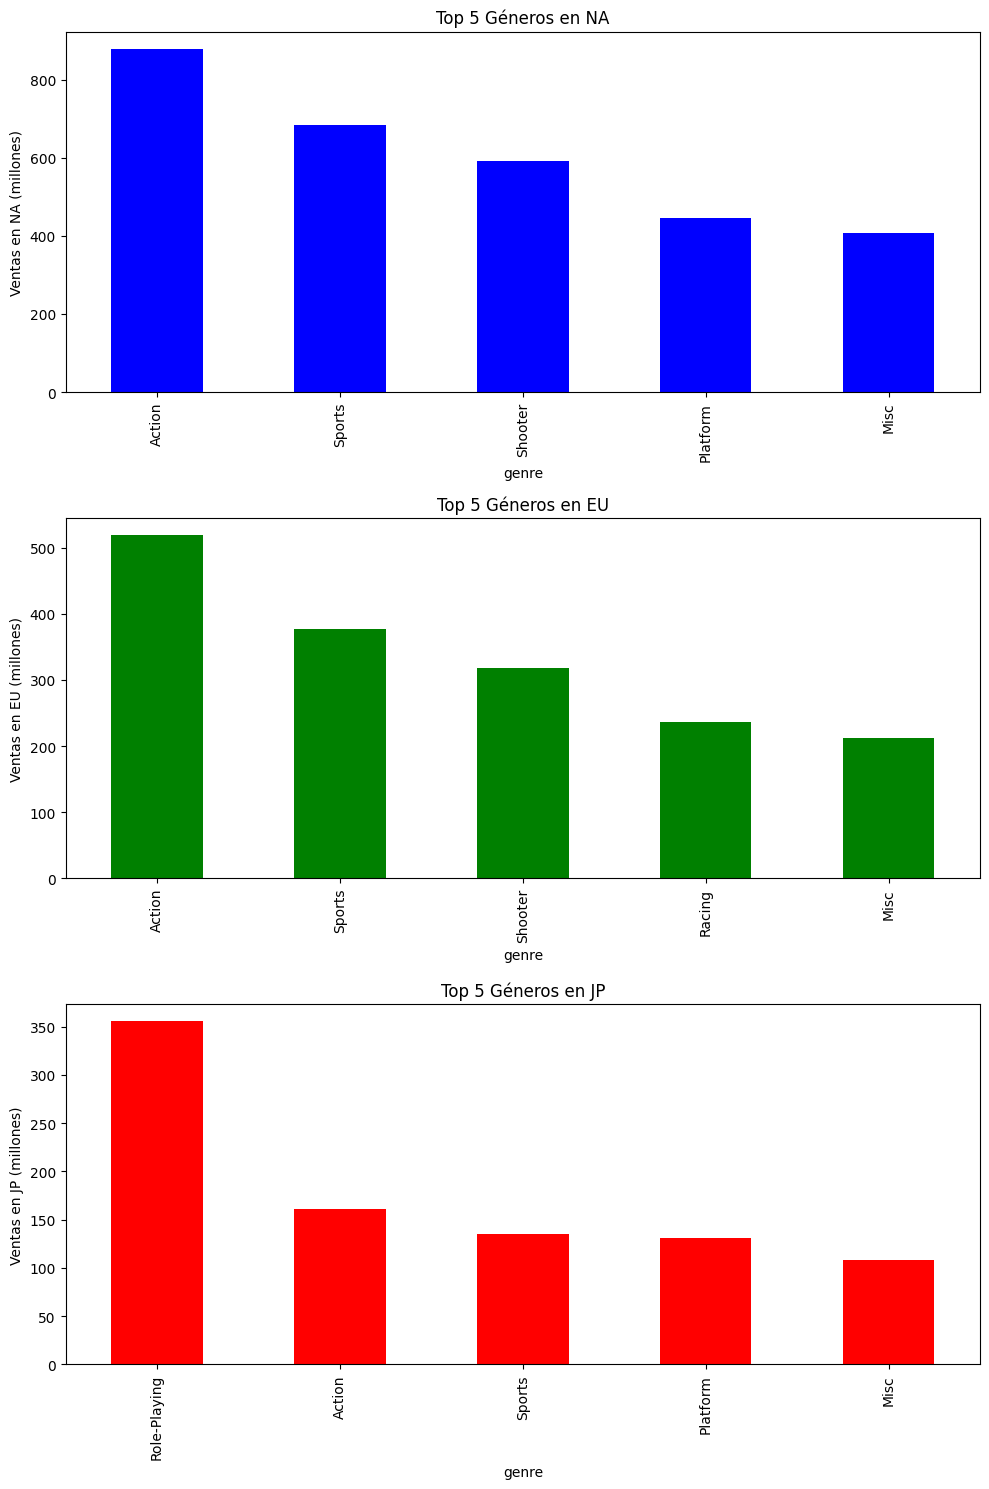

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

genre_sales_na.plot(kind='bar', ax=ax[0], color='blue', title='Top 5 Géneros en NA')
ax[0].set_ylabel('Ventas en NA (millones)')

genre_sales_eu.plot(kind='bar', ax=ax[1], color='green', title='Top 5 Géneros en EU')
ax[1].set_ylabel('Ventas en EU (millones)')

genre_sales_jp.plot(kind='bar', ax=ax[2], color='red', title='Top 5 Géneros en JP')
ax[2].set_ylabel('Ventas en JP (millones)')

plt.tight_layout()
plt.show()

Explicación: Se usaron gráficos similares a los de las plataformas para mostrar los géneros más populares en cada región.

<span style='color:blue'> Diferencias entre géneros: </span> Las preferencias de géneros de videojuegos varían significativamente entre regiones. En Norteamérica y Europa, los géneros de acción y deportes son los más populares, reflejando una cultura que valora la competitividad y la adrenalina. En Japón, los juegos de rol (RPG) dominan, lo que muestra una preferencia por experiencias más narrativas y profundas. Estas diferencias culturales indican que los desarrolladores de videojuegos deben adaptar sus estrategias según la región para maximizar su éxito.

<span style='color:blue'>  Impacto de las clasificaciones ESRB en las ventas por región: </span>

In [42]:
esrb_sales_na = data.groupby('rating')['na_sales'].sum()
esrb_sales_eu = data.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = data.groupby('rating')['jp_sales'].sum()

esrb_sales_na
esrb_sales_eu
esrb_sales_jp

rating
AO        0.00
E       198.11
E10+     40.20
EC        0.00
K-A       1.46
M        64.24
RP        0.00
T       151.40
Name: jp_sales, dtype: float64

Explicación: Se calcularon las ventas asociadas con cada clasificación ESRB en las diferentes regiones.

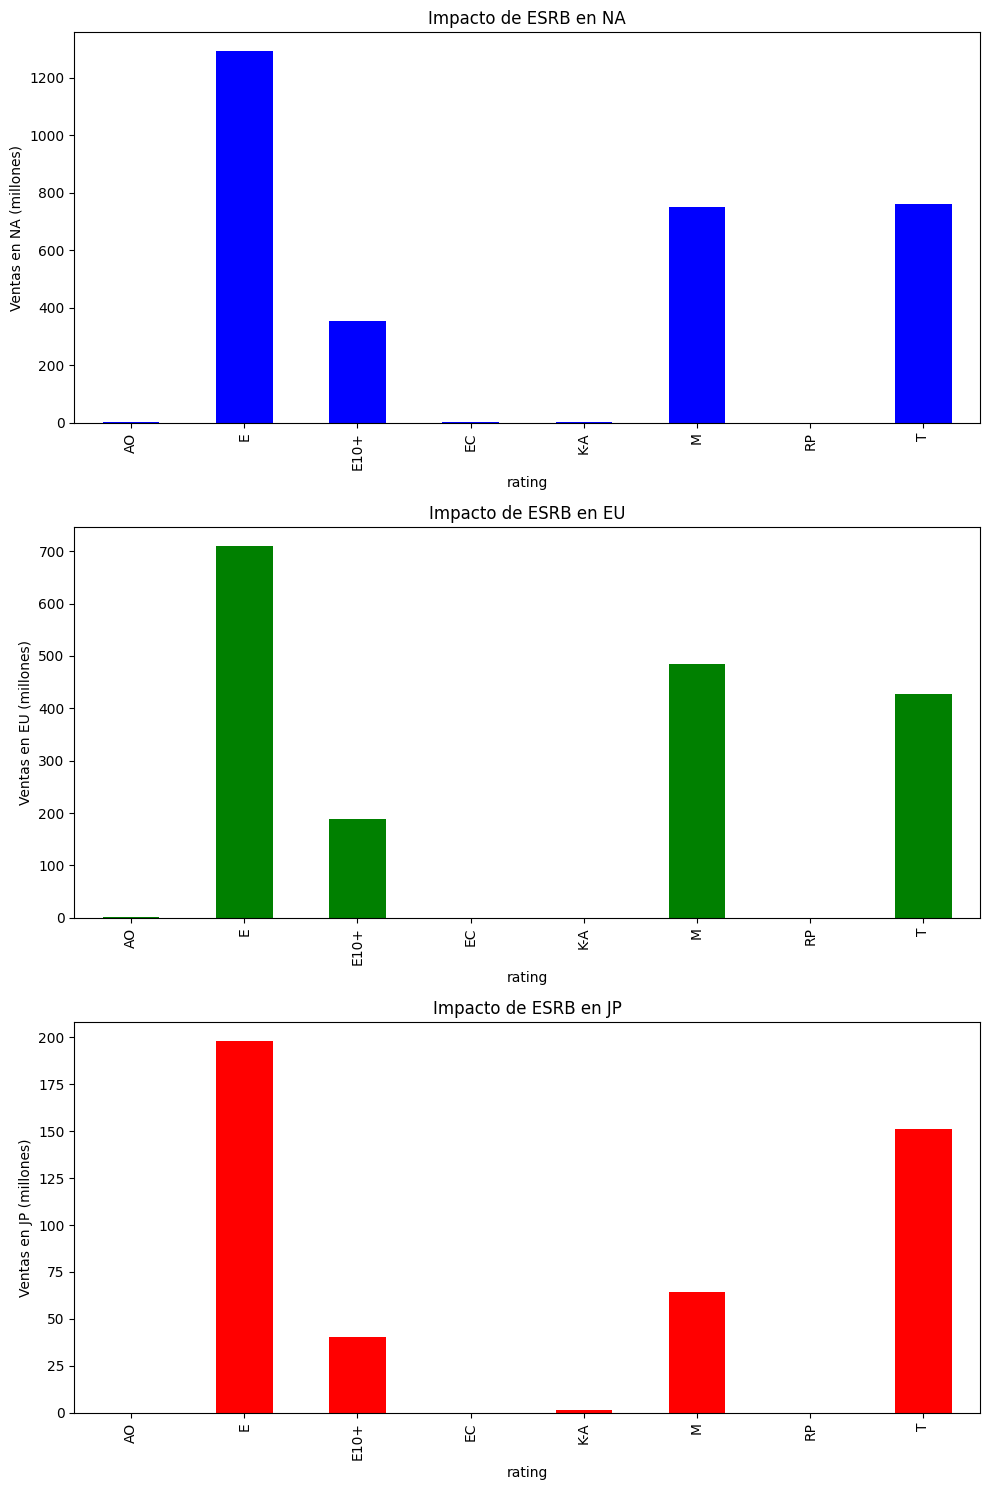

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

esrb_sales_na.plot(kind='bar', ax=ax[0], color='blue', title='Impacto de ESRB en NA')
ax[0].set_ylabel('Ventas en NA (millones)')

esrb_sales_eu.plot(kind='bar', ax=ax[1], color='green', title='Impacto de ESRB en EU')
ax[1].set_ylabel('Ventas en EU (millones)')

esrb_sales_jp.plot(kind='bar', ax=ax[2], color='red', title='Impacto de ESRB en JP')
ax[2].set_ylabel('Ventas en JP (millones)')

plt.tight_layout()
plt.show()

Explicación: Se usaron gráficos graficos para ver cómo las diferentes clasificaciones ESRB afectan las ventas en cada región.

<span style='color:blue'> Impacto de las Clasificaciones ESRB: </span> Las clasificaciones de contenido ESRB influyen notablemente en las ventas de videojuegos en diferentes regiones, reflejando sensibilidades culturales y regulaciones locales. En Norteamérica y Europa, los juegos clasificados como "E" (Everyone) tienen las mayores ventas, lo que sugiere una preferencia por juegos accesibles a todas las edades. En Japón, la clasificación "E" también lidera, pero los juegos clasificados como "T" (Teen) y "M" (Mature) tienen un peso significativo, lo que podría indicar una mayor tolerancia hacia contenidos más maduros en comparación con otras regiones. Las diferencias en ventas según la clasificación resaltan cómo la percepción del contenido varía entre culturas, impactando las estrategias de mercado en cada región.

# Paso 5. Prueba las siguientes hipótesis

<span style='color:blue'> Hipótesis 1: Comparación de Calificaciones de Usuarios entre Xbox One y PC: </span>

Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

In [53]:
# Convertir 'user_score' a numérico, tratando 'tbd' y otros no numéricos como NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Filtrar los datos para Xbox One y PC, asegurando que solo consideramos valores no nulos
xbox_one_scores = data[(data['platform'] == 'XOne') & (data['user_score'].notna())]['user_score']
pc_scores = data[(data['platform'] == 'PC') & (data['user_score'].notna())]['user_score']

# Realizar la prueba de Levene para verificar la igualdad de varianzas
levene_test = stats.levene(xbox_one_scores, pc_scores)

print(f"Levene test statistic: {levene_test.statistic}, P-value: {levene_test.pvalue}")

# Decidir sobre la asunción de varianzas iguales basado en el p-value de Levene
equal_var = levene_test.pvalue > 0.05

# Realizar el test t de muestras independientes con la asunción de varianzas adecuada
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

# Umbral alfa establecido
alpha = 0.05

# Resultados de la prueba
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.")

Levene test statistic: 7.777487276480662e-05, P-value: 0.9929649852182456
T-statistic: -3.9004867777916163, P-value: 0.00010123955107193582
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.


Explicación
Prueba de Levene: Determina si las varianzas entre dos muestras son estadísticamente diferentes. Un p-value alto indica que podemos asumir varianzas iguales para el test t.
Test t de Muestras Independientes: Evalúa si las medias de dos grupos independientes son estadísticamente diferentes, con la asunción de varianzas basada en los resultados de la prueba de Levene.
Valor de Umbral Alfa:  0.05, lo que significa que si el valor p es menor que 0.05, rechazaremos la hipótesis nula.

<span style='color:blue'> Hipótesis 2: Comparación de Calificaciones de Usuarios entre Géneros de Acción y Deportes: </span>

Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

In [54]:
# Asegurar que los datos están en la variable 'data' y convertir calificaciones a numérico
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Filtrar los datos para cada género, asegurando que solo consideramos valores no nulos
action_scores = data[(data['genre'] == 'Action') & (data['user_score'].notna())]['user_score']
sports_scores = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]['user_score']

# Realizar la prueba de Levene para verificar la igualdad de varianzas
levene_test = stats.levene(action_scores, sports_scores)

print(f"Levene test statistic: {levene_test.statistic}, P-value: {levene_test.pvalue}")

# Decidir sobre la asunción de varianzas iguales basado en el p-value de Levene
equal_var = levene_test.pvalue > 0.05

# Realizar el test t de muestras independientes con la asunción de varianzas adecuada
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

# Umbral alfa establecido
alpha = 0.05

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")

Levene test statistic: 0.16699629968166063, P-value: 0.6828105166182066
T-statistic: 0.3676581294613721, P-value: 0.7131417795320426
No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


Explicación
Prueba de Levene: Determina si las varianzas entre dos muestras son estadísticamente diferentes. Un p-value alto indica que podemos asumir varianzas iguales para el test t.
Test t de Muestras Independientes: Evalúa si las medias de dos grupos independientes son estadísticamente diferentes, con la asunción de varianzas basada en los resultados de la prueba de Levene.
Valor de Umbral Alfa:  0.05, lo que significa que si el valor p es menor que 0.05, rechazaremos la hipótesis nula.

<span style='color:blue'>¿Cómo se formuló las hipótesis nula y alternativa?¿Qué criterio utilizaste para probar las hipótesis y por qué? </span>

Cuando se formularon las hipótesis para las comparaciones entre plataformas y géneros, se estableció una hipótesis nula (H0) que afirmaba que no había diferencias significativas en las calificaciones promedio de los usuarios—ya sea entre las plataformas Xbox One y PC, o entre los géneros de Acción y Deportes. La hipótesis alternativa (H1), por otro lado, sugirió que existían diferencias significativas en las calificaciones promedio entre estos grupos.

Para probar estas hipótesis, se eligió utilizar el test t de muestras independientes. Este método es ideal para comparar las medias de dos grupos independientes, como los usuarios de diferentes plataformas o géneros de juegos. Se optó por este método porque permite evaluar si las diferencias observadas en las medias de las calificaciones son estadísticamente significativas. Además, el test t es robusto y eficaz incluso cuando las distribuciones no son perfectamente normales y las varianzas entre grupos son moderadamente desiguales, condiciones comunes en datos reales.

Se eligió un umbral alfa de 0.05, lo que significa que existe un 5% de probabilidad de rechazar la hipótesis nula por error (error tipo I) si en realidad es verdadera. Este umbral es un estándar común en la investigación estadística, equilibrando la detección de efectos reales con la protección contra conclusiones falsas.

# Paso 6. Conclusión general

El proyecto reveló patrones significativos en la preferencia y el comportamiento de compra de videojuegos en diferentes regiones. Aunque las plataformas populares como Xbox One y PC no mostraron diferencias estadísticamente significativas en las calificaciones de los usuarios, sí se observaron diferencias notables entre los géneros de juegos, particularmente entre Acción y Deportes, lo cual podría reflejar divergencias en las preferencias de los jugadores o en la promoción de estos géneros.

Además, la influencia de las reseñas en las ventas, aunque presente, no fue tan decisiva como se podría esperar, lo que sugiere que las decisiones de compra pueden estar más influenciadas por factores como la lealtad a la plataforma, la innovación en el juego, y las campañas de marketing efectivas.

En cuanto a las clasificaciones de ESRB, su impacto variado en diferentes regiones resalta la importancia de entender las sensibilidades culturales y regulaciones locales al lanzar y promocionar juegos en mercados internacionales.

Este análisis no solo ayuda a entender mejor el mercado de videojuegos, sino que también proporciona datos valiosos para desarrolladores y comercializadores de juegos que buscan optimizar sus estrategias según las preferencias y tendencias del mercado.